In [1]:
%pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl.metadata (2.7 kB)
  Using cached tensorflow_gpu-2.4.1-cp38-cp38-win_amd64.whl.metadata (2.7 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

2. KEYPOINT USING MP HOLISTIC

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
import cv2
import mediapipe as mp

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        original_height, original_width, _ = frame.shape
        print("Chiều cao ban đầu của ảnh:", original_height)
        print("Chiều rộng ban đầu của ảnh:", original_width)

        if not ret:
            break
        
        # Process every alternate frame
        if frame_count % 2 == 0:
            image, results = mediapipe_detection(frame, holistic)
            print(results)
            
            # Draw landmarks
            draw_landmarks(image, results)
            draw_styled_landmarks(image, results)
        else:
            image = frame
        
        # Resize the frame to fit the display window
        image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)  # Adjust the scaling factor as needed
        
        # Show the processed frame
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
        frame_count += 1
    
    cap.release()
    cv2.destroyAllWindows()


In [ ]:
import cv2
import mediapipe as mp

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process every alternate frame
        image, results = mediapipe_detection(frame, holistic)
            # Draw landmarks
        draw_landmarks(image, results)
        draw_styled_landmarks(image, results)
        
        # Show the processed frame
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    
    cap.release()
    cv2.destroyAllWindows()


In [ ]:
# len(results.left_hand_landmarks.landmark)
print( 2*3*len(results.left_hand_landmarks.landmark) +4*len(results.pose_landmarks.landmark))
print(len(results.pose_landmarks.landmark))
print(len(results.left_hand_landmarks.landmark))

In [ ]:
results

In [ ]:
draw_landmarks(frame, results)

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

3. EXTRACT KEYPOINT VALUES

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
print(len(results.left_hand_landmarks.landmark))
print(len(results.pose_landmarks.landmark))

In [7]:
def extract_keypoints2(results):
    
    # selected_face_landmarks = [
    # # Eyebrows
    # 20, 21, 22, 23, 24,
    # # Eyes
    # 38, 39, 42, 43,
    # # Nose
    # 1, 4, 7, 10, 12, 13, 14, 15,
    # # Mouth
    # 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
    # # Jawline
    # 3, 6, 9, 11, 16, 17, 18, 19, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 44, 45, 46, 47
    # ]
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark[:23]]).flatten() if results.pose_landmarks else np.zeros(23*4)
    # face = np.array([[res.x, res.y, res.z] for idx, res in enumerate(results.face_landmarks.landmark) if idx in selected_face_landmarks]).flatten() if results.face_landmarks else np.zeros(len(selected_face_landmarks)*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

# Usage example
# keypoints = extract_keypoints(results)


In [ ]:
# selected_face_landmarks = [
#     # Eyebrows
#     20, 21, 22, 23, 24,
#     # Eyes
#     38, 39, 42, 43,
#     # Nose
#     1, 4, 7, 10, 12, 13, 14, 15,
#     # Mouth
#     48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
#     # Jawline
#     3, 6, 9, 11, 16, 17, 18, 19, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 44, 45, 46, 47
#     ] 
# print(len(selected_face_landmarks))
# face = np.array([[res.x, res.y, res.z] for idx, res in enumerate(results.face_landmarks.landmark) if idx in selected_face_landmarks]).flatten() if results.face_landmarks else np.zeros(len(selected_face_landmarks)*3)
# print(len(face))
# pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark[:23]]).flatten() if results.pose_landmarks else np.zeros(23*4)
# print(len(pose))
# #face = np.array([[res.x, res.y, res.z] for idx, res in enumerate(results.face_landmarks.landmark) if idx in selected_face_landmarks]).flatten() if results.face_landmarks else np.zeros(len(selected_face_landmarks)*3)

# lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
# print(len(lh))
# rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
# print(len(rh))
# print(pose)

In [ ]:
result_test = extract_keypoints2(results)
print(len(result_test))

In [ ]:
np.save('0', result_test)

In [ ]:
np.load('0.npy')

In [24]:

#ADD DIRECTORY FOR DATA STORAGE(TESTING)
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')
# actions = np.array(['Hello','HowAreYou','WhatsUp','GoodOrWell','Fine','Bad','Great','Nothing','Busy',
#                     'SoSo','Name','What','Work','Where','Deaf','Know','Hearing','HardToHearing','Age',
#                     'Yes','No','Understand','DontUnderstand','Learn','ASL','Sign'
#            ])
#DontUnderstand Thirsty
actions = np.array(['AgainOrRepeat','Age','ASL','Bad','BathRoom','Busy','Chat','Come','Deaf','DontLike','DontUnderstand',
                    'Favorite','Fine','Friend','Go','GoodBye','GoodOrWell','Great','HardToHearing','Have','HaventOrNotYet',
                    'Hearing','Hello','HowAreYou','Learn','Like','Name','NiceToMeetYou','No','Nothing','OhISee','Please',
                    'Ready','Restaurant','School','Slow','SeeYouLater','Sign','Sorry','SoSo','TakeCare','Teacher','ThankYou',
                    'Understand','Want','What','WhatsUp','Where','Work','Yes','I','You','Communicate','Morning','Afternoon',
                    'Night','Nice','Meet','Know','FinishOrDone','Help','Wrong','Girl','Boy','Need','Say','My','Your','Love',
                    'Buy','Car','Home','Drink','GiveToYou','Ask','Forget','More','Right','Happy','Sad','Same','Who','When',
                    'Why','HowMuch','Always','Hour','Past','Future','Dating','Father','Mother','Bowling','Coffee','Tea',
                    'Apple','Carrot','Peach','Fifteen','Thirty'
                ])

# DontUnderstand
# actions = np.array(['AgainOrRepeat','Age','ASL','Bad','BathRoom','Busy','Chat','Come','Deaf','DontLike',
#                     'Favorite','Fine','Friend','Go','GoodBye','GoodOrWell','Great','HardToHearing','Have','HaventOrNotYet',
#                     'Hearing','Hello','HowAreYou','Learn','Like','Name','NiceToMeetYou','No','Nothing','OhISee','Please',
#                     'Ready','Restaurant','School','Slow','SeeYouLater','Sign','Sorry','SoSo','TakeCare','Teacher',
#                     'Understand','Want','What','WhatsUp','Where','Work','Yes','I','You','Communicate','Morning','Afternoon',
#                     'Night','Nice','Meet','Know','FinishOrDone','Help','Wrong','Girl','Boy','Need','Say','My','Your','Love',
#                     'Buy','Car','Home','Drink','GiveToYou','Ask','Forget','More','Right','Happy','Sad','Same','Who','When',
#                     'Why','HowMuch','Always','Hour','Past','Future','Dating','Father','Mother','Bowling','Coffee','Tea',
#                     'Apple','Carrot','Peach','Fifteen'
#                 ])


#Hoang
# actions = np.array(['Hello','HowAreYou','WhatsUp','GoodOrWell','Fine','Bad','Great','Nothing','Busy',
#                     'SoSo','Name','What','Work','Where','Deaf','Hearing','HardToHearing','Age',
#                     'Yes','No','Understand','DontUnderstand','Learn','ASL','Sign'
#            ])

#Ngan
# actions = np.array(['Always','Apple','Bowling','Carrot','Coffee','Dating','Father','Fifteen','Forget',
#                     'Future','Happy','Hour','HowMuch','More','Mother','Past','Peach','RightOrCorrect',
#                     'Sad','Same','Tea','Thirty','When','Who','Why'
#            ])

# actions = np.array(['AgainOrRepeat','BathRoom','Chat','Come','DontLike','Favorite','Friend','Go','GoodBye',
#                     'Have','HaventOrNotYet','Like','NiceToMeetYou','OhISee','Please','Ready','Restaurant',
#                     'School','SeeYouLater','Slow','Sorry','TakeCare','Teacher','ThankYou','Want'
#                     ])

#Thao
# actions = np.array(['Afternoon','Ask','Boy','Buy','Car','Communicate','Drink','FinishOrDone','Girl',
#                     'Give','Help','Home','I','Know','Love','Meet','Morning','MyOrMine','Need','Nice',
#                     'Night','Say','Wrong','You','Your'
#                     ])

# actions = np.array(['AgainOrRepeat','Age','ASL','Bad','BathRoom','Busy','Chat','Come','Deaf','DontLike','DontUnderstand',
#                     'Favorite','Fine','Friend','Go','GoodBye','GoodOrWell','Great','HardToHearing','Have','HaventOrNotYet',
#                     'Hearing','Hello','HowAreYou','Learn','Like','Name','NiceToMeetYou','No','Nothing','OhISee','Please',
#                     'Ready','Restaurant','School','SeeYouLater','Sign','Sorry','SoSo','Slow','TakeCare','Teacher','ThankYou',
#                     'Understand','Want','What','WhatsUp','Where','Work','Yes','Always','Apple','Bowling','Carrot','Coffee',
#                     'Dating','Father','Fifteen','Forget','Future','Happy','Hour','HowMuch','More','Mother','Past','Peach',
#                     'RightOrCorrect','Sad','Same','Tea','Thirty','When','Who','Why'
#                     ])

# actions = np.array(['AgainOrRepeat','Age','ASL','Bad','BathRoom','Busy','Chat','Come','Deaf',
#                     'Favorite','Fine','Friend','Go','GoodBye','GoodOrWell','Great','HardToHearing','Have','HaventOrNotYet',
#                     'Hearing','Hello','HowAreYou','Learn','Like','Name','NiceToMeetYou','No','Nothing','OhISee','Please',
#                     'Ready','Restaurant','School','Sorry','SoSo','Slow','TakeCare','Teacher',
#                     'Understand','Want','WhatsUp','Where','Work','Yes','Always','Apple','Bowling','Carrot','Coffee',
#                     'Dating','Father','Fifteen','Forget','Future','Happy','HowMuch','More','Mother','Past','Peach',
#                     'RightOrCorrect','Sad','Same','Tea','When','Why'
#                     ])

# actions = np.array(['Hello','Work','Know','Where','Deaf'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 50 frames in length
sequence_length = 30

# Folder start
start_folder = 1
print(len(actions))

100


In [ ]:
#Fifteen videos worth of data
# Videos are going to 100 frames in length
actions = np.array(['I','Fine','ThankYou','SeeYouLater'
                ])
for action in actions:
    # Ensure the action directory exists
    action_dir = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_dir):
        os.makedirs(action_dir)

    # Create directories for each sequence
    for sequence in range(1, no_sequences + 1):
        sequence_dir = os.path.join(action_dir, str(sequence))
        os.makedirs(sequence_dir, exist_ok=True)

In [ ]:
# actions = np.array(['Hello','Fine','More','Coffee'
#                 ])
actions = np.array(['ThankYou'])
#Deaf Work Where Hello Know

In [ ]:
import cv2
import mediapipe as mp

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Process every alternate frame
        image, results = mediapipe_detection(frame, holistic)
            # Draw landmarks
        draw_landmarks(image, results)
        draw_styled_landmarks(image, results)
        
        # Show the processed frame
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # NEW LOOP
    # Loop through actions

    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                
                # NEW Export keypoints
                keypoints = extract_keypoints2(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

TRAINING VIDEO CAPTURE

In [ ]:
# action = 'Why'
# sequence = 2
# cap = cv2.VideoCapture('D:\\VideoCaptureForTrain\\Why1.mp4')
# # Set mediapipe model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     # NEW LOOP
#     # Loop through actions
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)
#                 image = cv2.resize(image, (0, 0), fx=0.8, fy=0.8)
#                 # NEW Apply wait logic
#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(500)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints2(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 # Break gracefully
                
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                    
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# import os
# import shutil
# # Same When Who Why
# source_folder = 'D:\\MP_Data\\Coffee\\2'  # Source folder
# destination_folder = 'D:\\MP_Data\\Coffee'  # Destination folder

# # Iterate through folders 1 to 30
# for i in range(1,31):
#     destination_path = os.path.join(destination_folder, str(i))
#     try:
#         # Copy contents of source folder to destination folder
#         shutil.copytree(source_folder, destination_path)
#         print(f"Folder '2' copied successfully to folder '{i}'.")
#     except Exception as e:
#         print(f"Error copying folder '2' to folder '{i}': {e}")


In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'AgainOrRepeat': 0,
 'Age': 1,
 'ASL': 2,
 'Bad': 3,
 'BathRoom': 4,
 'Busy': 5,
 'Chat': 6,
 'Come': 7,
 'Deaf': 8,
 'DontLike': 9,
 'DontUnderstand': 10,
 'Favorite': 11,
 'Fine': 12,
 'Friend': 13,
 'Go': 14,
 'GoodBye': 15,
 'GoodOrWell': 16,
 'Great': 17,
 'HardToHearing': 18,
 'Have': 19,
 'HaventOrNotYet': 20,
 'Hearing': 21,
 'Hello': 22,
 'HowAreYou': 23,
 'Learn': 24,
 'Like': 25,
 'Name': 26,
 'NiceToMeetYou': 27,
 'No': 28,
 'Nothing': 29,
 'OhISee': 30,
 'Please': 31,
 'Ready': 32,
 'Restaurant': 33,
 'School': 34,
 'Slow': 35,
 'SeeYouLater': 36,
 'Sign': 37,
 'Sorry': 38,
 'SoSo': 39,
 'TakeCare': 40,
 'Teacher': 41,
 'ThankYou': 42,
 'Understand': 43,
 'Want': 44,
 'What': 45,
 'WhatsUp': 46,
 'Where': 47,
 'Work': 48,
 'Yes': 49,
 'I': 50,
 'You': 51,
 'Communicate': 52,
 'Morning': 53,
 'Afternoon': 54,
 'Night': 55,
 'Nice': 56,
 'Meet': 57,
 'Know': 58,
 'FinishOrDone': 59,
 'Help': 60,
 'Wrong': 61,
 'Girl': 62,
 'Boy': 63,
 'Need': 64,
 'Say': 65,
 'My': 66,
 'Yo

NORMALIZE DATA(PROCESSING)

In [ ]:
# filenames = [str(i) for i in range(1, 31)]  # File names from '1' to '30'
# actions = np.array(['AgainOrRepeat','BathRoom','Chat','Come','DontLike','Favorite','Friend','Go','GoodBye',
#                     'Have','HaventOrNotYet','Like','NiceToMeetYou','OhISee','Please','Ready','Restaurant',
#                     'School','SeeYouLater','Slow','Sorry','TakeCare','Teacher','ThankYou','Want'
#                     ])
# # 192 - 64 - 468
# # 92 - 24 - 33
# # 63 - 21 - 21
# # 63 - 21 - 21
# # 1662
# # 468
# # 33
# # 21
# length_sequence = 29
# # Iterate over each action
# for action in actions:
#     for filename in filenames:
#         for i in range(length_sequence):
#         # Load data from the .npy file
#             file_path = os.path.join('MP_Data',action,filename ,"{}.npy".format(i))
#             if os.path.exists(file_path):
#                 data = np.load(file_path)

#                 # Separate the data into pose, face, lh, and rh
#                 pose_data = data[:, :33*4]
#                 face_data = data[:, 33*4:33*4+468*3]
#                 lh_data = data[:, 33*4+468*3:33*4+468*3+21*3]
#                 rh_data = data[:, 33*4+468*3+21*3:]

#                 # Normalize each parameter independently
#                 pose_data_normalized = (pose_data - pose_data.mean(axis=0)) / pose_data.std(axis=0)
#                 face_data_normalized = (face_data - face_data.mean(axis =0)) / face_data.std(axis=0)
#                 lh_data_normalized = (lh_data - lh_data.mean(axis=0)) / lh_data.std(axis=0)
#                 rh_data_normalized = (rh_data - rh_data.mean(axis=0)) / rh_data.std(axis=0)

#                 # Concatenate the normalized parameters back together
#                 normalized_data = np.concatenate([pose_data_normalized, face_data_normalized, lh_data_normalized, rh_data_normalized], axis=1)

#                 # Save the normalized data to a new .npy file
#                 normalized_file_path = os.path.join('MP_DataN', action, filename , '{}_n.npy'.format(i))
#                 os.makedirs(os.path.dirname(normalized_file_path), exist_ok=True)
#                 np.save(normalized_file_path, normalized_data)


In [ ]:
# selected_face_landmarks = [
#     # Eyebrows
#     20, 21, 22, 23, 24,
#     # Eyes
#     38, 39, 42, 43,
#     # Nose
#     1, 4, 7, 10, 12, 13, 14, 15,
#     # Mouth
#     48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
#     # Jawline
#     3, 6, 9, 11, 16, 17, 18, 19, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 44, 45, 46, 47
# ]
# print(len(selected_face_landmarks))

In [11]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [27]:
# np.array(sequences).shape
sequences = np.array(sequences)
print(sequences.shape)

(3000, 30, 218)


In [28]:
np.array(labels).shape

(3000,)

In [29]:
X = np.array(sequences)

In [30]:
X.shape

(3000, 30, 218)

In [31]:
y = to_categorical(labels).astype(int)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.66, random_state=42)

# Printing the shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (2100, 30, 218) (2100, 100)
Validation set shape: (306, 30, 218) (306, 100)
Test set shape: (594, 30, 218) (594, 100)


In [33]:
y_test.shape

(594, 100)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import RMSprop

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
# RECOVERY MODEL

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,218)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

RMSprop

Epoch 1/90
66/66 [==============================] - 12s 91ms/step - loss: 4.6007 - categorical_accuracy: 0.0181 - val_loss: 4.4731 - val_categorical_accuracy: 0.0327
Epoch 2/90
66/66 [==============================] - 5s 80ms/step - loss: 4.2657 - categorical_accuracy: 0.0319 - val_loss: 4.0338 - val_categorical_accuracy: 0.0490
Epoch 3/90
66/66 [==============================] - 6s 87ms/step - loss: 3.8541 - categorical_accuracy: 0.0386 - val_loss: 3.8811 - val_categorical_accuracy: 0.0327
Epoch 4/90
66/66 [==============================] - 5s 81ms/step - loss: 3.4592 - categorical_accuracy: 0.0610 - val_loss: 3.4559 - val_categorical_accuracy: 0.0686
Epoch 5/90
66/66 [==============================] - 6s 88ms/step - loss: 3.2254 - categorical_accuracy: 0.0943 - val_loss: 3.1444 - val_categorical_accuracy: 0.0882
Epoch 6/90
66/66 [==============================] - 5s 81ms/step - loss: 2.7796 - categorical_accuracy: 0.1633 - val_loss: 2.5615 - val_categorical_accuracy: 0.2353
Epoch 7/9

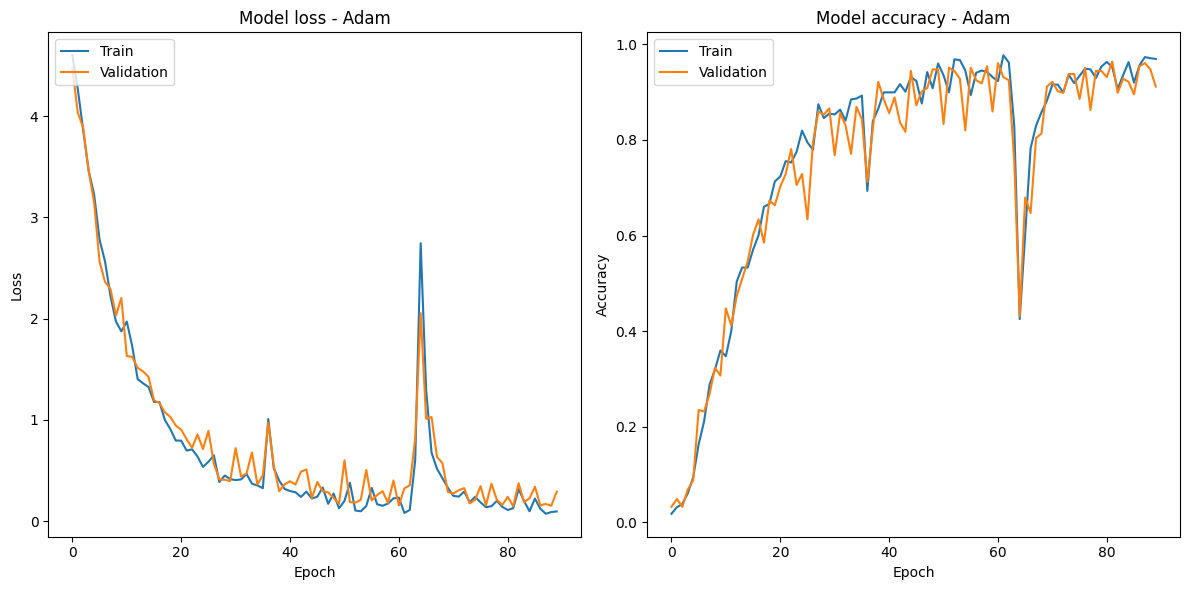

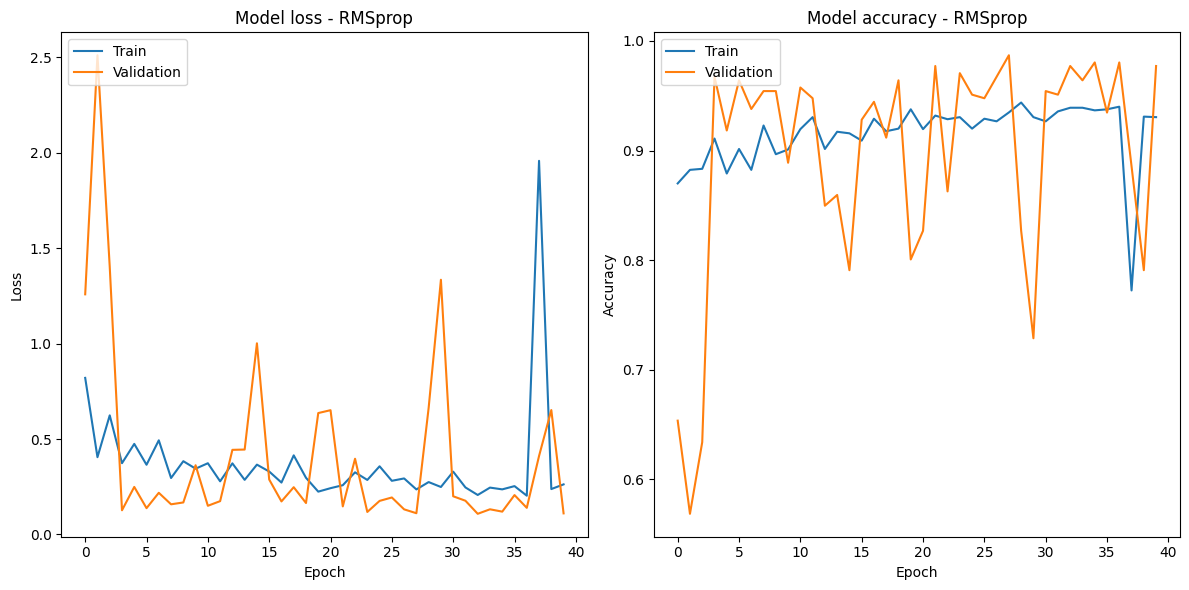

In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

# Define TensorBoard callback for visualization
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# Define the model
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 218)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model
history_adam = model.fit(X_train, y_train, epochs=90, validation_data=(X_val, y_val), callbacks=[tb_callback])

# Compile the model with RMSprop optimizer
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model
history_rmsprop = model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), callbacks=[tb_callback])

# Plot loss and accuracy history
def plot_history(history, title):
    plt.figure(figsize=(12, 6))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss - ' + title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('Model accuracy - ' + title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot history for Adam optimizer
plot_history(history_adam, 'Adam')

# Plot history for RMSprop optimizer
plot_history(history_rmsprop, 'RMSprop')


In [ ]:
# RECOVERY MODEL
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
#\Logs\train> tensorboard --logdir=.
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [ ]:
model.summary()

In [ ]:
res = model.predict(X_test)

In [ ]:
res

In [ ]:
actions[np.argmax(res[4])]
# np.argmax(res[4])

In [ ]:
actions[np.argmax(y_test[4])]

9. SAVE WEIGHTS

In [ ]:
model.save('action.h5')

In [ ]:
from keras.models import load_model
model = load_model('action.h5')

In [ ]:
# del model

In [ ]:
model.load_weights('action.h5')

10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

11.TEST IN REAL TIME

In [ ]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
sequence = []
# sentence = []
sentence = ""
predictions = []
threshold = 0.9
#Hello Where Know Deaf Work
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results) 
        # draw_landmarks(image,results)
        # 2. Prediction logic
        keypoints = extract_keypoints2(results)
        sequence.append(keypoints)
        # sequence = sequence[-30:]
        sequence = sequence[-30:]
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))


        #3. Viz logic
            if np.unique(predictions[-29:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        # if actions[np.argmax(res)] != sentence[-1]:
                        if actions[np.argmax(res)] != sentence:
                            # sentence.append(actions[np.argmax(res)])
                            sentence = ""
                            sentence += actions[np.argmax(res)]
                    else:
                        #sentence.append(actions[np.argmax(res)])
                        sentence += actions[np.argmax(res)]

            # if len(sentence) == 1: 
            #     sentence = sentence[-1:]
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ''.join(sentence), (280,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import mediapipe as mp
from keras import models
from keras.models import save_model
from keras.models import load_model
# from keras.models import saving_api
#from keras.initializers import OrthogonalInitializer

import firebase_admin
from firebase_admin import db, credentials
import time

cred = credentials.Certificate("credentials.json")
firebase_admin.initialize_app(cred, {"databaseURL": "https://signapp-f1a3d-default-rtdb.asia-southeast1.firebasedatabase.app/"})
ref = db.reference("/Messages")
def PostFirebase(content):
    now_tiktak = int(time.time())
    objectJson = {
        "Content": content,
        "From": 1,
        "To": 2,
        "Time": now_tiktak
    }
    # ref.push(objectJson)
    ref.update({str(now_tiktak): objectJson})

# thêm màu vào ảnh
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils

#LOAD MODEL ACTION.H5
model = load_model('action.h5')


def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )
def extract_keypoints(results):
            pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark[:23]]).flatten() if results.pose_landmarks else np.zeros(23*4)
            lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
            rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
            return np.concatenate([pose, lh, rh])

sequence = []
# sentence = []
sentence = ""
predictions = []
threshold = 0.9

actions = np.array(['AgainOrRepeat','Age','ASL','Bad','BathRoom','Busy','Chat','Come','Deaf','DontLike','DontUnderstand',
                    'Favorite','Fine','Friend','Go','GoodBye','GoodOrWell','Great','HardToHearing','Have','HaventOrNotYet',
                    'Hearing','Hello','HowAreYou','Learn','Like','Name','NiceToMeetYou','No','Nothing','OhISee','Please',
                    'Ready','Restaurant','School','Slow','SeeYouLater','Sign','Sorry','SoSo','TakeCare','Teacher','ThankYou',
                    'Understand','Want','What','WhatsUp','Where','Work','Yes','I','You','Communicate','Morning','Afternoon',
                    'Night','Nice','Meet','Know','FinishOrDone','Help','Wrong','Girl','Boy','Need','Say','My','Your','Love',
                    'Buy','Car','Home','Drink','GiveToYou','Ask','Forget','More','Right','Happy','Sad','Same','Who','When',
                    'Why','HowMuch','Always','Hour','Past','Future','Dating','Father','Mother','Bowling','Coffee','Tea',
                    'Apple','Carrot','Peach','Fifteen','Thirty'
                ])
# Visualize image
# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
#         cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
#                     cv2.LINE_AA)

#     return output_frame

URL = "http://192.168.241.71/mjpeg/1" #"http://192.168.240.71:81/stream"
cap = cv2.VideoCapture(URL) #0
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)  
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))


        # từ sau này là vẽ cho xink
        #3. Viz logic
            if np.unique(predictions[-29:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence:
                            sentence = ""
                            sentence += actions[np.argmax(res)]
                            PostFirebase(actions[np.argmax(res)])
                    else:
                        sentence += actions[np.argmax(res)]
                        PostFirebase(actions[np.argmax(res)])

            # if len(sentence) > 5: 
            #     sentence = sentence[-5:]
            # # Viz probabilities
            # image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (280,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()